<a href="https://colab.research.google.com/github/Marisha18/Market-Segmentation-for-Electric-Vehicles-in-India/blob/main/Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Market Segmentation**
### **Task done as part of FeyNN Labs Internship**
Analysing Real Estate Market in India using Segmentation analysis and come up with a  feasible strategy to enter the market, targeting the segments most likely to use their product in terms of Geographic, Demographic, Psychographic, Behavioral.
### **Authors:**
*   **Mohamed Illiyas**
*   **Susnata Biswas**
*   **Vijayaragavan**

## **Importing Libraries**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## **Data Preprocessing**

In [ ]:
# Importing consumer buying behavior study dataset
df = pd.read_csv("C:\\Users\\SUSNATA BISWAS\\OneDrive\\Desktop\_All_Cities_Cleaned.csv")
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [ ]:
df.shape

(193011, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193011 entries, 0 to 193010
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    193011 non-null  object 
 1   bedroom        193011 non-null  float64
 2   layout_type    193011 non-null  object 
 3   property_type  193011 non-null  object 
 4   locality       193011 non-null  object 
 5   price          193011 non-null  float64
 6   area           193011 non-null  float64
 7   furnish_type   193011 non-null  object 
 8   bathroom       193011 non-null  float64
 9   city           193011 non-null  object 
dtypes: float64(4), object(6)
memory usage: 14.7+ MB


In [ ]:
df.describe()

,bedroom,price,area,bathroom
count,193011.000000,1.930110e+05,193011.000000,193011.000000
mean,2.081679,4.433654e+04,1264.604468,2.059883
std,0.956901,9.195199e+04,1043.725561,0.934805
min,1.000000,1.200000e+03,3.000000,1.000000
25%,1.000000,1.300000e+04,650.000000,1.000000
50%,2.000000,2.100000e+04,1000.000000,2.000000
75%,3.000000,3.600000e+04,1440.000000,3.000000
max,15.000000,5.885000e+06,19800.000000,19.000000


In [ ]:
df.columns

Index(['seller_type', 'bedroom', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom', 'city'],
      dtype='object')

In [ ]:
# Observing unique value for object dtype'property_type','House Loan','Wife Working','Make']:city
for col in ['seller_type','bedroom','layout_type','property_type','locality','price','area','furnish_type', 'bathroom' , 'city']:
  print(col,':',df[col].unique())

seller_type : ['OWNER' 'AGENT' 'BUILDER']
bedroom : [ 2.  1.  3.  4.  5.  6. 10.  7.  8. 15.  9. 12. 14. 11.]
layout_type : ['BHK' 'RK']
property_type : ['Apartment' 'Studio Apartment' 'Independent House' 'Independent Floor'
 'Villa' 'Penthouse']
locality : ['Bodakdev' 'CG Road' 'Jodhpur' ... 'Renuka Nagar' 'Gananjay Society'
 'Aundh Gaon']
price : [20000.  7350. 22000. ... 15120.  8640.  5850.]
area : [1450.  210. 1900. ... 3575. 1721.  258.]
furnish_type : ['Furnished' 'Semi-Furnished' 'Unfurnished']
bathroom : [ 2.  1.  3.  4.  5.  6. 12.  7.  8. 15.  9. 18. 19. 10. 16. 14.]
city : ['Ahmedabad' 'Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai'
 'Pune']


In [ ]:
# Observing Column entries
for col in df.columns:
  print(df[col].value_counts())

36    13
35    10
31     8
34     7
41     7
27     6
37     6
30     5
42     5
29     4
44     4
39     4
28     3
51     3
49     3
33     2
32     2
43     2
45     2
50     1
46     1
26     1
Name: Age, dtype: int64
Salaried    64
Business    35
Name: Profession, dtype: int64
Married    84
Single     15
Name: Marrital Status, dtype: int64
Post Graduate    56
Graduate         43
Name: Education, dtype: int64
3    34
2    29
0    22
4    14
Name: No of Dependents, dtype: int64
No     67
Yes    32
Name: Personal loan, dtype: int64
No     62
Yes    37
Name: House Loan, dtype: int64
Yes    52
No     46
m       1
Name: Wife Working, dtype: int64
1400000    17
900000      8
1800000     7
2700000     6
1300000     6
1100000     6
1600000     5
1900000     5
2200000     5
2000000     4
3100000     4
800000      4
1200000     3
1700000     3
2400000     3
1500000     2
2500000     2
2900000     2
2100000     2
2600000     1
3800000     1
2800000     1
200000      1
2300000     1
Name: Sala

#### **Cleaning Data**

In [ ]:
## Double checking the percentage of empty entries column wise
df.isnull().sum() / df.shape[0] * 100.00

seller_type      0.0
bedroom          0.0
layout_type      0.0
property_type    0.0
locality         0.0
price            0.0
area             0.0
furnish_type     0.0
bathroom         0.0
city             0.0
dtype: float64

There are no null entries.

In [ ]:
df=df.replace(to_replace ="m", value ="No")
df.loc[11]

seller_type            OWNER
bedroom                  2.0
layout_type              BHK
property_type      Apartment
locality           Maninagar
price                15000.0
area                   990.0
furnish_type     Unfurnished
bathroom                 2.0
city               Ahmedabad
Name: 11, dtype: object

## **Behavioral and Psychographic Analysis**

In [ ]:
# plt.figure(1,figsize=(100,20))
# n = 0
# for cols in ['seller_type','bedroom','layout_type','property_type','furnish_type','bathroom']:
#   n += 1
#   plt.subplot(1,6,n)
#   sns.set(style = 'whitegrid')
#   plt.subplots_adjust(hspace=0.5,wspace=0.5)
#   sns.violinplot(x= cols, y = 'price', data=df)
#   plt.ylabel("price" if n==1 else '')
#   plt.title('Violin Plot')

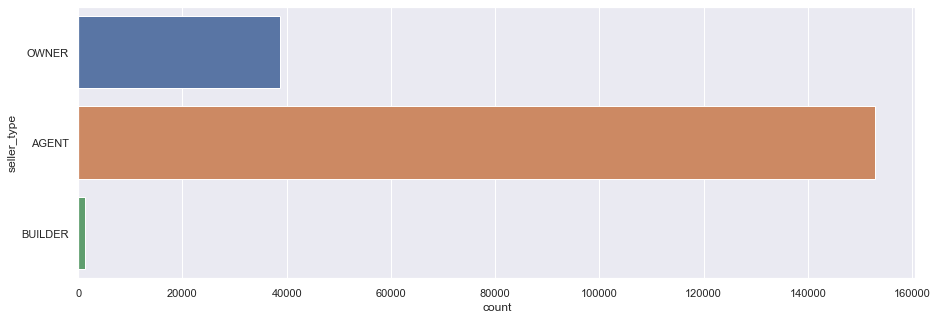

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.set(style="darkgrid")
ax = sns.countplot(y="seller_type", data=df)

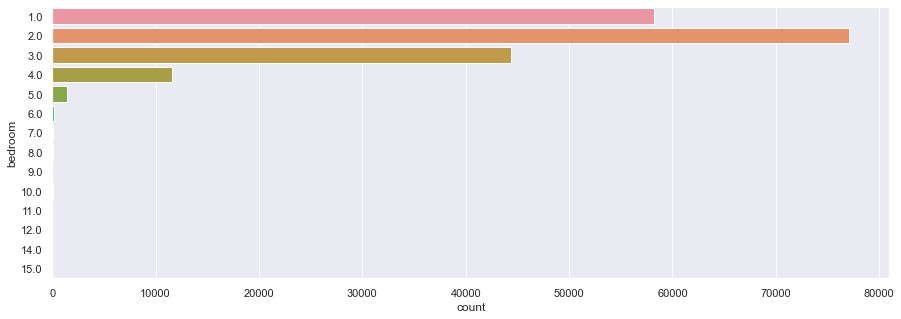

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.set(style="darkgrid")
ax = sns.countplot(y="bedroom", data=df)

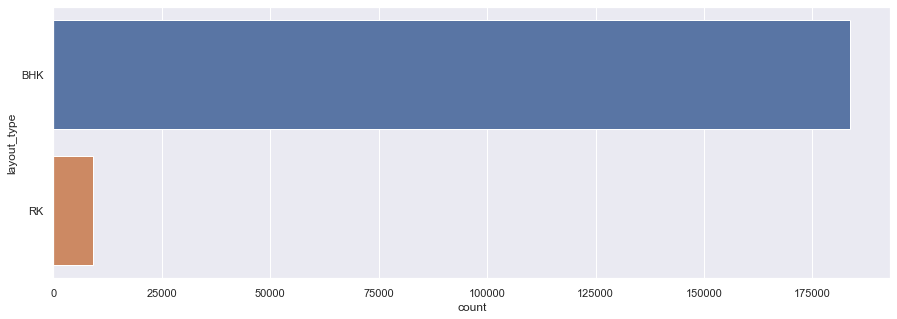

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.set(style="darkgrid")
ax = sns.countplot(y="layout_type", data=df)

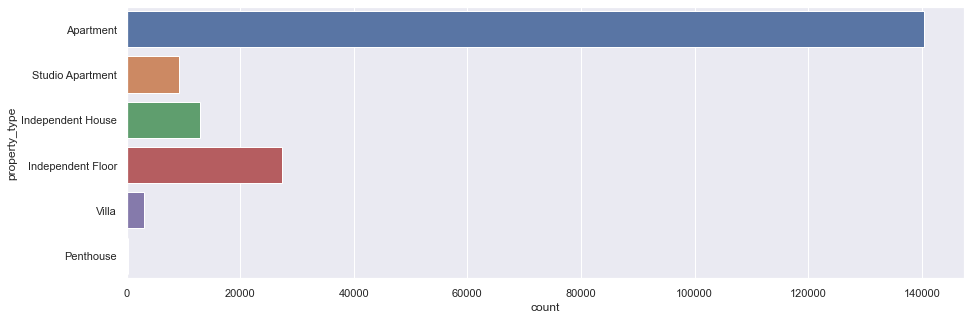

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.set(style="darkgrid")
ax = sns.countplot(y="property_type", data=df)

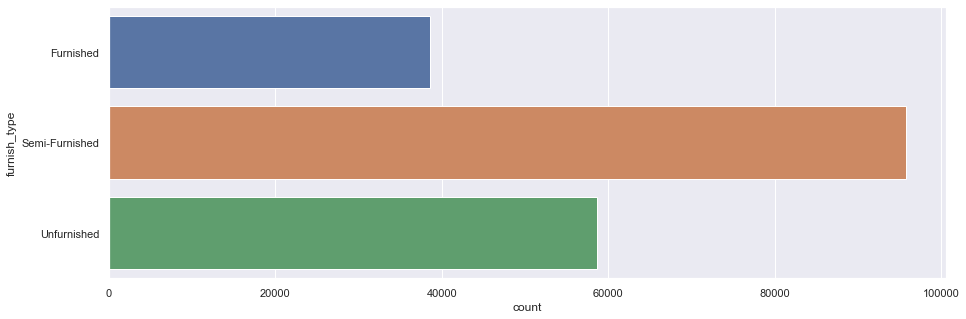

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.set(style="darkgrid")
ax = sns.countplot(y="furnish_type", data=df)

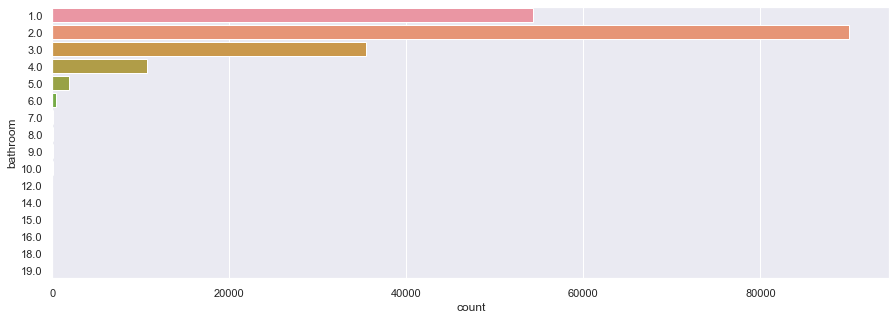

In [ ]:
plt.figure(1 , figsize = (15 , 5))
sns.set(style="darkgrid")
ax = sns.countplot(y="bathroom", data=df)

***Observations:***


*   <u>Seller type</u>: Agents sell the more number of flats.
*   <u>Bedrooms</u>: Attachment with 2 attached bedrooms is preferred mostly.
*   <u>Layout type</u>: BHK is preferred by most of the sellers.
*   <u>Property type</u>: Apartment is the most selling property.
*   <u>Furnished type</u>: Semi-furnished is the most furnished property.
*   <u>Bathrooms</u>: Attachment with 2 bathrooms is preferred mostly.



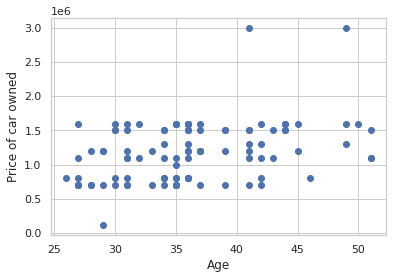

In [ ]:
plt.xlabel('Age')
plt.ylabel('Price of car owned')
plt.scatter(df['Age'],df['Price'])

**2.   Relation between consumers' total salary and the vehicles they tend to purchase**

*   Make of vehicles they tend to purchase

*   Price of vehicle owned

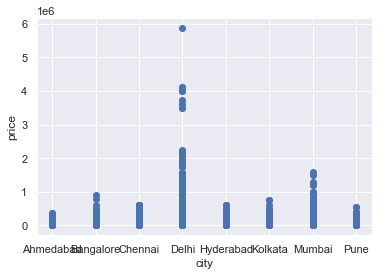

In [ ]:
plt.xlabel('city')
plt.ylabel('price')
plt.scatter(df['city'],df['price'])

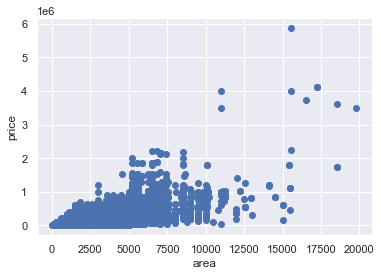

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df['area'],df['price'])

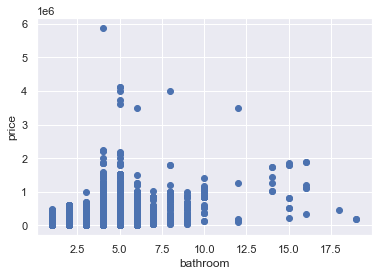

In [ ]:
plt.xlabel('bathroom')
plt.ylabel('price')
plt.scatter(df['bathroom'],df['price'])

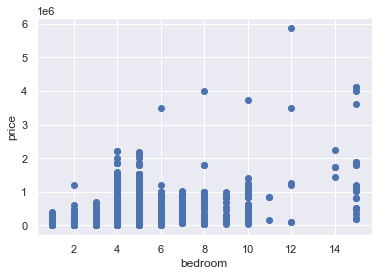

In [ ]:
plt.xlabel('bedroom')
plt.ylabel('price')
plt.scatter(df['bedroom'],df['price'])

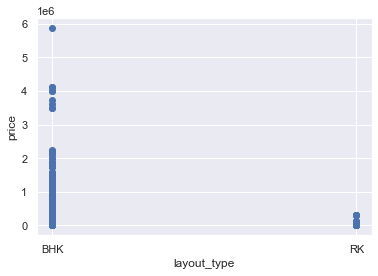

In [ ]:
plt.xlabel('layout_type')
plt.ylabel('price')
plt.scatter(df['layout_type'],df['price'])

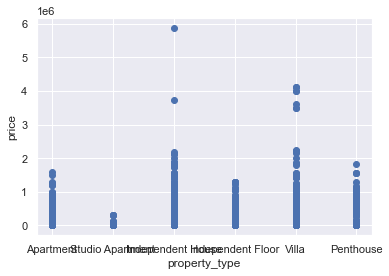

In [ ]:
plt.xlabel('property_type')
plt.ylabel('price')
plt.scatter(df['property_type'],df['price'])

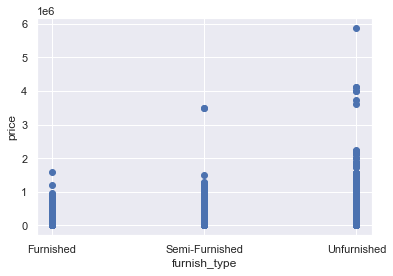

In [ ]:
plt.xlabel('furnish_type')
plt.ylabel('price')
plt.scatter(df['furnish_type'],df['price'])

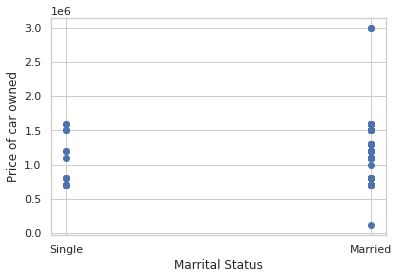

In [ ]:
plt.xlabel('Marrital Status')
plt.ylabel('Price of car owned')
plt.scatter(df['Marrital Status'],df['Price'])

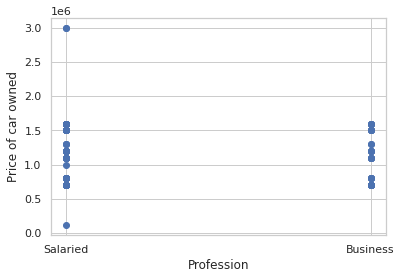

In [ ]:
plt.xlabel('Profession')
plt.ylabel('Price of car owned')
plt.scatter(df['Profession'],df['Price'])

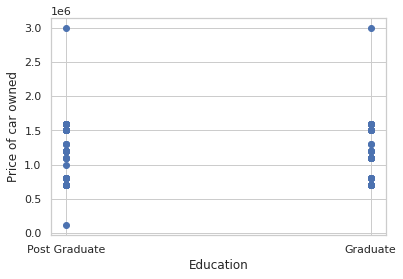

In [ ]:
plt.xlabel('Education')
plt.ylabel('Price of car owned')
plt.scatter(df['Education'],df['Price'])

**7. Relation between consumers loan status (indicator of purchasing power) and the vehicles they tend to purchase**

*   Make of vehicles they tend to purchase (based on personal loan)

*   Price of vehicle owned (based on personal loan)

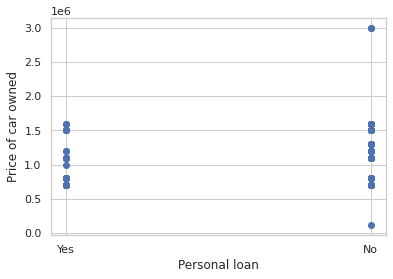

In [ ]:
plt.xlabel('Personal loan')
plt.ylabel('Price of car owned')
plt.scatter(df['Personal loan'],df['Price'])

*   Make of vehicles they tend to purchase (based on house loan)

*   Price of vehicle owned (based on house loan)

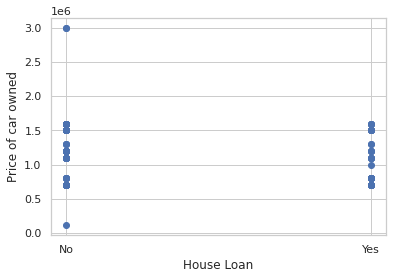

In [ ]:
plt.xlabel('House Loan')
plt.ylabel('Price of car owned')
plt.scatter(df['House Loan'],df['Price'])

In [ ]:
# # Plotting for int64 dtype columns
# plt.figure(1, figsize=(15,6))
# n=0
# for x in ['','No of Dependents','Salary','Wife Salary','Total Salary','Price']
#   plt.subplot(1,6,n)
#   plt.subplots_adjust(hspace=0.5, wspace=0.5)
#   sns.distplot(df[x], bins = 20)
#   plt.title('Distplot of {}'.format(x))
# plt.show()

<AxesSubplot:>

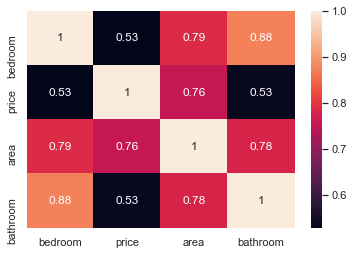

In [ ]:
# Heatmap of Correlation
sns.heatmap(df.corr(), annot=True)

***Observations:***
There isn't any striking new relation found, but it confirms our previous observations.

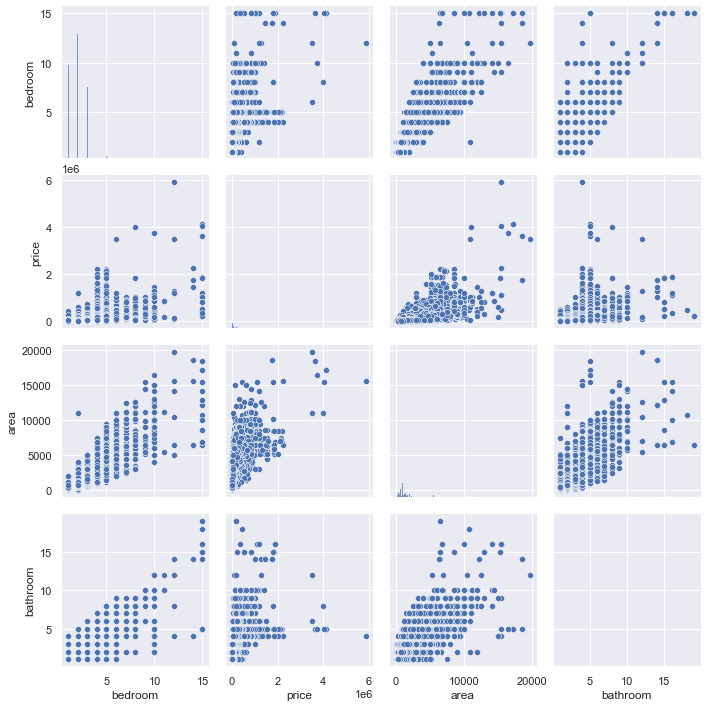

In [ ]:
# Pair Plot
sns.pairplot(df)

## **Model Deployment**
### **K-Means Clustering**

In [ ]:
x1 = df.iloc[:,df.columns!='locality']
x2  = x1.iloc[:,x1.columns!='city']
x2.head()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom
0,OWNER,2.0,BHK,Apartment,20000.0,1450.0,Furnished,2.0
1,OWNER,1.0,RK,Studio Apartment,7350.0,210.0,Semi-Furnished,1.0
2,OWNER,3.0,BHK,Apartment,22000.0,1900.0,Unfurnished,3.0
3,OWNER,2.0,BHK,Independent House,13000.0,1285.0,Semi-Furnished,2.0
4,OWNER,2.0,BHK,Independent House,18000.0,1600.0,Furnished,2.0


In [ ]:
encoding = {"seller_type":{"OWNER": 0, "AGENT": 1 , "BUILDER" : 2},
#             "bedroom":{"Single": 0, "Married": 1},
            "layout_type":{"BHK": 0, "RK": 1},
            "property_type":{"Apartment": 0, "Studio Apartment": 1, "Independent House": 2 , "Independent Floor" :3 , "Villa" : 4 , "Penthouse" : 4},
            "furnish_type":{"Furnished": 0, "Semi-Furnished": 1 , "Unfurnished" :2},
            }

In [ ]:
obj_df = x2.replace(encoding)
obj_df.head()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom
0,0,2.0,0,0,20000.0,1450.0,0,2.0
1,0,1.0,1,1,7350.0,210.0,1,1.0
2,0,3.0,0,0,22000.0,1900.0,2,3.0
3,0,2.0,0,2,13000.0,1285.0,1,2.0
4,0,2.0,0,2,18000.0,1600.0,0,2.0


**K - Means Algorithm**



In [ ]:
# Importing Important Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
X_scaled = StandardScaler().fit_transform(obj_df)
X_scaled = pd.DataFrame(X_scaled,columns=['seller_type','bedroom','layout_type','property_type','area','price','furnish_type', 'bathroom'])
x = X_scaled.to_numpy()
X_scaled

,seller_type,bedroom,layout_type,property_type,area,price,furnish_type,bathroom
0,-1.955392,-0.085358,-0.224525,-0.567742,-0.264666,0.177629,-1.572290,-0.064059
1,-1.955392,-1.130402,4.453849,0.276015,-0.402239,-1.010426,-0.148341,-1.133803
2,-1.955392,0.959685,-0.224525,-0.567742,-0.242916,0.608778,1.275609,1.005685
3,-1.955392,-0.085358,-0.224525,1.119773,-0.340793,0.019541,-0.148341,-0.064059
4,-1.955392,-0.085358,-0.224525,1.119773,-0.286417,0.321345,-1.572290,-0.064059
...,...,...,...,...,...,...,...,...
193006,-1.955392,-1.130402,-0.224525,-0.567742,-0.338074,-0.588858,-0.148341,-1.133803
193007,-1.955392,-1.130402,4.453849,0.276015,-0.406045,-0.876291,1.275609,-1.133803
193008,-1.955392,-1.130402,-0.224525,-0.567742,-0.389732,-0.838924,-0.148341,-1.133803
193009,0.469466,-1.130402,-0.224525,-0.567742,-0.302730,-0.569696,-0.148341,-0.064059


In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

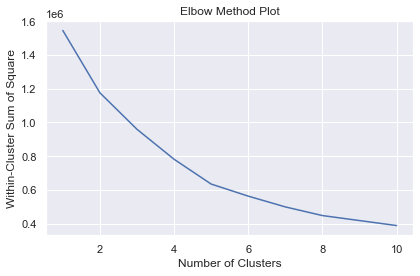

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

**K = 5**

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [ ]:
y = kmeans.predict(X_scaled)
y_df = pd.DataFrame(y,columns=['Class'])

In [ ]:
final_data = pd.concat([df,y_df],axis=1) 
final_data

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,Class
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad,2
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad,1
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad,2
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad,2
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad,2
...,...,...,...,...,...,...,...,...,...,...,...
193006,OWNER,1.0,BHK,Apartment,Chinchwad,13250.0,650.0,Semi-Furnished,1.0,Pune,2
193007,OWNER,1.0,RK,Studio Apartment,Wadgaon Sheri,7000.0,350.0,Unfurnished,1.0,Pune,1
193008,OWNER,1.0,BHK,Apartment,Kothrud,8500.0,389.0,Semi-Furnished,1.0,Pune,2
193009,AGENT,1.0,BHK,Apartment,Wakad,16500.0,670.0,Semi-Furnished,2.0,Pune,4


KeyError: 'Age'

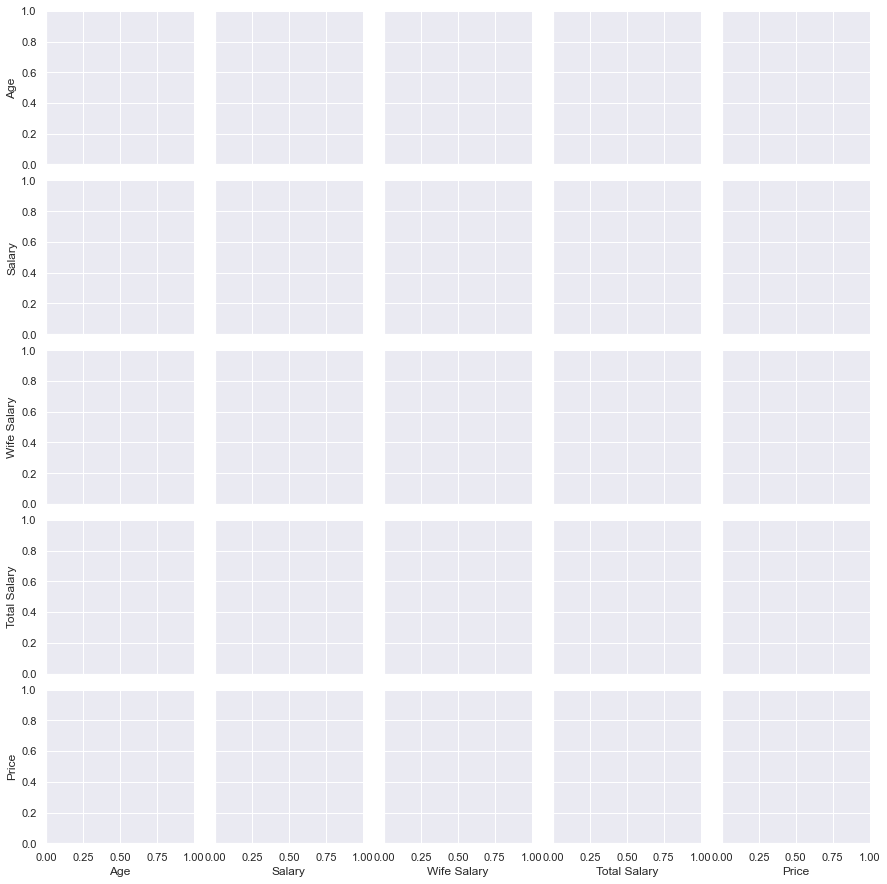

In [ ]:
sns.pairplot(final_data,x_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], y_vars = ['Age','Salary', 'Wife Salary','Total Salary','Price'], hue='Class')

**K = 5**

In [ ]:
kmeans1 = KMeans(n_clusters = 5, init = 'k-means++', 
                    max_iter = 300, n_init = 10,random_state = 42)
kmeans1.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [ ]:
y1 = kmeans1.predict(X_scaled)
y1_df = pd.DataFrame(y1,columns=['Class'])

In [ ]:
final_data1 = pd.concat([df,y1_df],axis=1) 
final_data1

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,Class
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad,2
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad,1
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad,2
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad,2
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad,2
...,...,...,...,...,...,...,...,...,...,...,...
193006,OWNER,1.0,BHK,Apartment,Chinchwad,13250.0,650.0,Semi-Furnished,1.0,Pune,2
193007,OWNER,1.0,RK,Studio Apartment,Wadgaon Sheri,7000.0,350.0,Unfurnished,1.0,Pune,1
193008,OWNER,1.0,BHK,Apartment,Kothrud,8500.0,389.0,Semi-Furnished,1.0,Pune,2
193009,AGENT,1.0,BHK,Apartment,Wakad,16500.0,670.0,Semi-Furnished,2.0,Pune,4


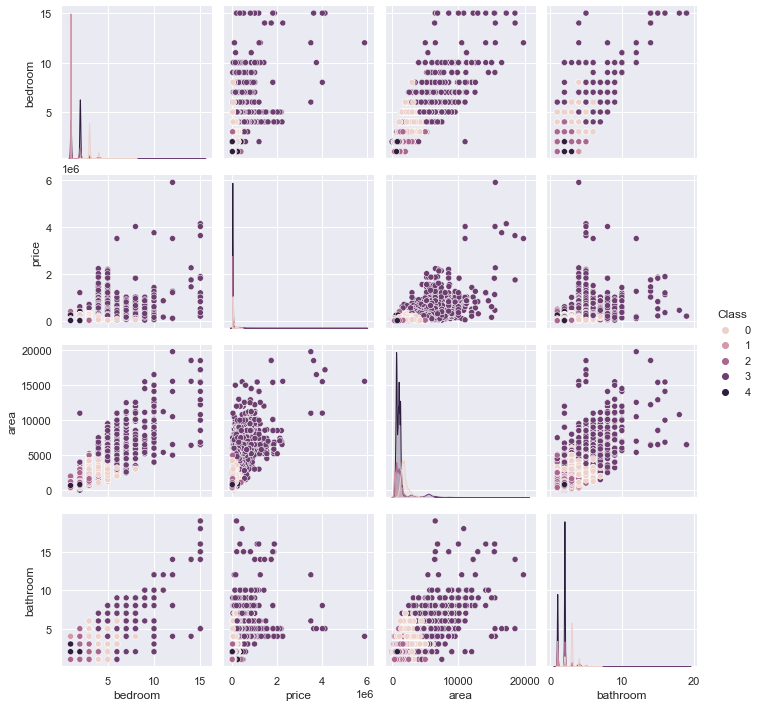

In [ ]:
sns.pairplot(final_data1,x_vars = ['bedroom','price','area','bathroom'], y_vars = ['bedroom','price','area','bathroom'], hue='Class')